In [98]:
import warnings
warnings.filterwarnings("ignore")

from carla.data.catalog import CsvCatalog
from carla import MLModelCatalog
from carla.recourse_methods import Clue, Wachter
from carla.models.negative_instances import predict_negative_instances
import numpy as np
# import torch

import sys
sys.path.insert(0,'..')
from recourse_util import update_dataset, train_recourse_method, predict, print_scores 

num = 10
# print(torch.cuda.is_available())

In [ ]:
def train_new_model(dataset):
    model = MLModelCatalog(dataset, "ann", load_online=False, backend="pytorch")
    model.train(
        learning_rate = 0.001,
        epochs = 10,
        max_depth = 50,
        n_estimators = 50,
        batch_size = 20,
        force_train = True
    )
    return model

In [ ]:
dataset = CsvCatalog(
    # file_path='datasets/bimodal_dataset_1.csv',
    file_path='datasets/unimodal_dataset_1.csv',
    # file_path='datasets/unimodal_dataset_2.csv',
    categorical=[],
    continuous=['feature1', 'feature2'],
    immutables=[],
    target='target'
)

In [ ]:
training_params = {"lr": 0.01, "epochs": 4, "batch_size": 1, "hidden_size": [4]}

model = MLModelCatalog(
    dataset,
    model_type="ann",
    load_online=False,
    backend="pytorch"
)

model.train(
    learning_rate=training_params["lr"],
    epochs=training_params["epochs"],
    batch_size=training_params["batch_size"],
    hidden_size=training_params["hidden_size"],
    force_train=True
)

In [ ]:
hyperparams = {
                "data_name": 'custom',
                "train_vae": True,
                "width": 10,
                "depth": 3,
                "latent_dim": 12,
                "batch_size": 4,
                "epochs": 5,
                "lr": 0.0001,
                "early_stop": 20,
            }

cl = train_recourse_method(dataset, model, 'custom', 'clue', hyperparams)

In [99]:
hyperparams = {
        "loss_type": "BCE"
    }

# load a recourse model and pass black box model
cl = Wachter(model, hyperparams)

In [100]:
# generate counterfactual samples
factuals = predict_negative_instances(model, dataset._df).sample(num)
print("Number of factuals", len(factuals))
factuals

Number of factuals 10


,feature1,feature2,target
82,0.219871,0.211270,0.0
86,0.409835,0.204356,0.0
54,0.148727,0.230646,0.0
73,0.180872,0.285400,0.0
58,0.169987,0.076563,0.0
69,0.248523,0.231950,0.0
52,0.071298,0.243434,0.0
89,0.237145,0.197705,0.0
22,0.178348,0.168054,0.0
29,0.200286,0.310336,0.0


In [101]:
counterfactuals = cl.get_counterfactuals(factuals)
print("Number of counterfactuals:", len(counterfactuals.dropna()))
counterfactuals

[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
Number of counterfactuals: 10


,feature1,feature2,target
82,0.463224,0.454617,1.0
86,0.546443,0.340958,1.0
54,0.430544,0.512456,1.0
73,0.423481,0.528002,1.0
58,0.500729,0.407296,1.0
69,0.471791,0.455211,1.0
52,0.392513,0.564639,1.0
89,0.479938,0.440491,1.0
22,0.469598,0.459295,1.0
29,0.423259,0.533303,1.0


In [102]:
post = dataset._df.copy()
update_dataset(post, factuals, counterfactuals)

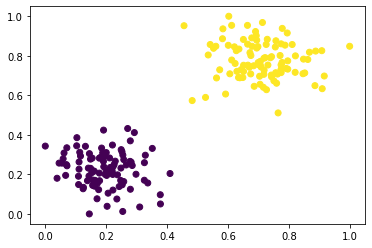

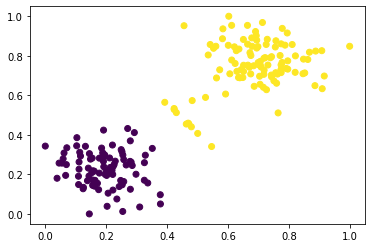

In [103]:
import matplotlib.pyplot as plt

plt.scatter(dataset._df['feature1'], dataset._df['feature2'], c=dataset._df['target'])
plt.show()

plt.scatter(post['feature1'], post['feature2'], c=post['target'])
plt.show()

# plt.scatter(factuals['feature1'], factuals['feature2'], c=factuals['target'])
# plt.show()